In [1]:
import numpy as np
import networkx as nx
import random as rnd
import matplotlib.pyplot as plt

CHARSET = list('abcdefghijklmonpqrtuvwxyz')
size = 4
#graph generation
a = np.arange(size*size).reshape((size,size))
G=nx.Graph()
for i in range(0,size*size):
    G.add_node(i)   
for x in range(0,size-1):
    for y in range(0,size):
        G.add_edge(a[x][y], a[x+1][y])
for x in range(0,size):
    for y in range(0,size-1):
        G.add_edge(a[x][y], a[x][y+1])       
for x in range(0,size-1):
    for y in range(0,size-1):
        G.add_edge(a[x][y], a[x+1][y+1])        
for x in range(0,size-1):
    for y in range(1,size):
        G.add_edge(a[x][y], a[x+1][y-1])

labeldict = {}
for i in range(0, size*size):
    labeldict[i]= rnd.choice(CHARSET)

posdict = {}
for i in range (0, size*size):
    posdict[i] = [i//size,i%size]

plt.figure(figsize=(7,4), dpi = 100)
plt.axis('off')
nx.draw_networkx(G,posdict, labels=labeldict, node_color="w")
plt.savefig('graph.png')

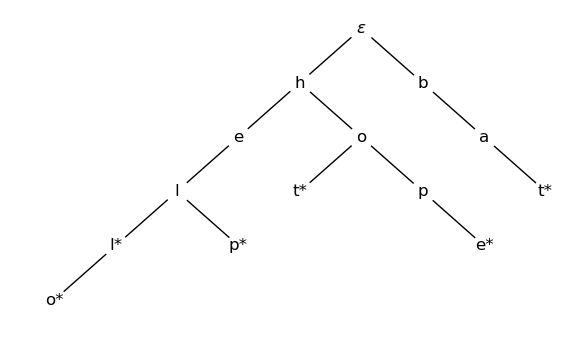

In [2]:
G=nx.Graph()
for i in range(1,14):
    G.add_node(i)  
G.add_edge(1,2)  
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(2,7)
G.add_edge(7,8)
G.add_edge(7,9)
G.add_edge(9,10)
G.add_edge(1,11)
G.add_edge(11,12)
G.add_edge(12,13)
G.add_edge(4,14)

posdict = {}
posdict[6]=(0,0)
posdict[5]=(1,1)
posdict[4]=(2,2)
posdict[3]=(3,3)
posdict[2]=(4,4)
posdict[1]=(5,5)
posdict[7]=(5,3)
posdict[8]=(4,2)
posdict[9]=(6,2)
posdict[10]=(7,1)
posdict[11]=(6,4)
posdict[12]=(7,3)
posdict[13]=(8,2)
posdict[14]=(3,1)

abc = [r'$\epsilon$','h','e','l','l*','o*','o','t*','p','e*','b','a','t*','p*']
labels = {}
for i in range(1,15):
    labels[i]=abc[i-1]
  
plt.figure(figsize=(7,4), dpi = 100)
plt.axis('off')
nx.draw_networkx(G, posdict, node_color="w", labels=labels)
plt.savefig('tree.png')

C:\Users\Riccardo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


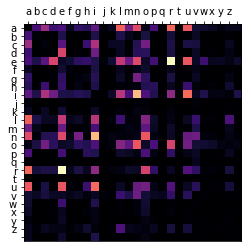

In [3]:
import numpy as np
import json
import matplotlib.pyplot as plt

with open('words_dictionary.json') as data_file:    
    data = json.load(data_file)
    
all_words = []
for d in data:
    if all(list(map(lambda x: x in list('abcdefghijklmnopqrtuvwxyz'), list(d)))):
        all_words.append(d)




def c2i(c):
    return ord(c)-ord('a')

def i2c(i):
    return chr(i+ord('a'))

m = np.zeros((26,26))
count = 0
for w in all_words:
    count = count+len(w)-1
    for i in range(0,len(w)-1):
        m[c2i(w[i]),c2i(w[i+1])] = m[c2i(w[i]),c2i(w[i+1])]+1

        
for r in range(0,26):
    for c in range(0,r):
        m[r,c] = m[r,c]+m[c,r]
        m[c,r] = m[r,c]
        
locs = np.arange(0,26,1)
f = plt.figure()
plt.xticks(locs, list('abcdefghijklmnopqrtuvwxyz'))
plt.yticks(locs, list('abcdefghijklmnopqrtuvwxyz'))
ax = f.add_subplot(111)
ax.xaxis.tick_top()
plt.imshow(m, cmap='magma')

plt.savefig('char_adj_matrix.png')

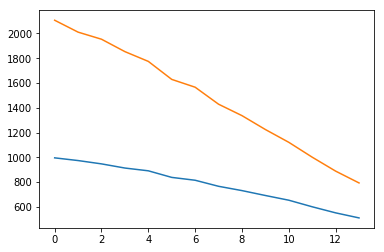

In [4]:
#results of the combined distribution algorithm while varying the size of the seed
WD = [995.48, 973.689, 946.846, 913.257, 890.901, 837.768, 814.743, 765.925, 731.174, 691.636, 653.643, 600.539, 551.547, 510.672]
SC= [2106.324, 2010.324, 1953.144, 1852.992, 1774.157, 1628.814, 1565.753, 1428.616, 1336.32, 1224.238, 1120.9, 1000.902, 888.455, 792.969]
plt.plot(WD)
plt.plot(SC)